# Homework 1 - Esercizio 2 
## Pierluigi Compagnone

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

**(a)**  Represent the interest pattern by using a simple bipartite graph

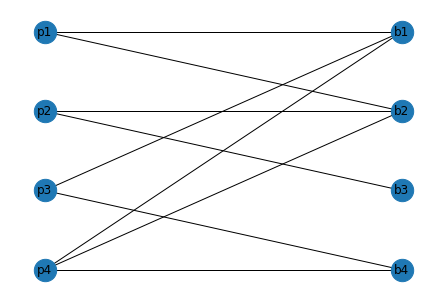

In [2]:
#building the simple bipartite graph G

G = nx.Graph()
G.add_edges_from([("p1","b1"),("p1","b2"),("p2","b2"),("p2","b3"),("p3","b1"),("p3","b4"),("p4","b1"),("p4","b2"),("p4","b4")])

pos = {"p1":[0,2], "p2":[0,1], "p3":[0,0], "p4":[0,-1], "b1":[1,2], "b2":[1,1], "b3":[1,0], "b4":[1,-1]}

#defining the partitions P and B

P = ["p1", "p2", "p3", "p4"]
B = ["b1", "b2", "b3", "b4"]

#plotting G

nx.draw(G,pos, with_labels=True, node_size = 500)

**(b)** Exploit max-flow problems to establish whether there exists a perfect matching that assigns
to every person a book of interest. If a perfect matching exists, find at least a perfect
matching.

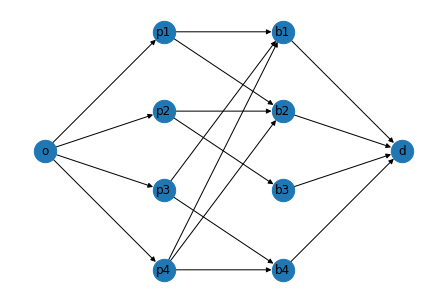

In [3]:
#building the auxiliary graph G1

G1 = nx.DiGraph()
G1.add_edges_from([("p1","b1"),("p1","b2"),("p2","b2"),("p2","b3"),("p3","b1"),("p3","b4"),("p4","b1"),("p4","b2"),("p4","b4")])
G1.add_edges_from([("o","p1"),("o","p2"),("o","p3"),("o","p4"),("b1","d"),("b2","d"),("b3","d"),("b4","d")])

pos1 = {"p1":[0,2], "p2":[0,1], "p3":[0,0], "p4":[0,-1], "b1":[1,2], "b2":[1,1], "b3":[1,0], "b4":[1,-1], "o":[-1,0.5], "d":[2,0.5]}

#plotting G1

nx.draw(G1,pos1, with_labels=True, node_size = 500)

In [4]:
#setting the capacity of the graph

for h,t in G1.edges():
    
    G1[h][t]["capacity"] = 1


#calculating the maximum flow

max_flow = nx.algorithms.flow.maximum_flow(G1, "o", "d", capacity = 'capacity')

print("The maximum throughput is: ", max_flow[0])

if max_flow[0] == len(P):
    print("\nbeing the maximum throughput equal to the number of nodes of set P, a P-perfect matching exists \n")
    print("a possible perfect matching is: ") 
    for p in P:
        print(p,": ",max_flow[1][p])
else:
    print("P-perfect matching does not exist")
    

The maximum throughput is:  4

being the maximum throughput equal to the number of nodes of set P, a P-perfect matching exists 

a possible perfect matching is: 
p1 :  {'b1': 0, 'b2': 1}
p2 :  {'b2': 0, 'b3': 1}
p3 :  {'b1': 1, 'b4': 0}
p4 :  {'b1': 0, 'b2': 0, 'b4': 1}


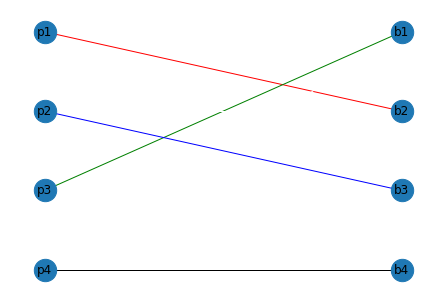

In [5]:
#plotting a possible P-perfect matching given by the flow of maximum throughput max_flow[1]

for h,t in G.edges():
    G[h][t]['color'] = 'white'    

G["p1"]["b2"]['color'] = 'red'
G["p2"]["b3"]['color'] = 'blue'
G["p3"]["b1"]['color'] = 'green'
G["p4"]["b4"]['color'] = 'black'

colors = [G[h][t]['color'] for h,t in G.edges()]


nx.draw(G, pos, with_labels = True, edge_color = colors, node_size=500)

**(c)** Assume now that there are multiple copies of book, specifically the distribution of the number
of copies is (2,3,2,2), and there is no constraint on the number of books that each person
can take. Use the analogy with max-flow problems to establish how many books of interest
can be assigned in total.

In [6]:
#changing the capacity of the auxiliary graph G1, considering the book distribution

distribution = [2,3,2,2]

for p in P:
    G1["o"][p]["capacity"] = 4
    
for i in range(len(B)):
    G1[B[i]]["d"]["capacity"] = distribution[i]
    
    
#calculating the maximum flow

max_flow = nx.algorithms.flow.maximum_flow(G1, "o", "d", capacity = 'capacity')

print("The maximum throughput, that coincides with the number of books assigned, is: ", max_flow[0])

The maximum throughput, that coincides with the number of books assigned, is:  8


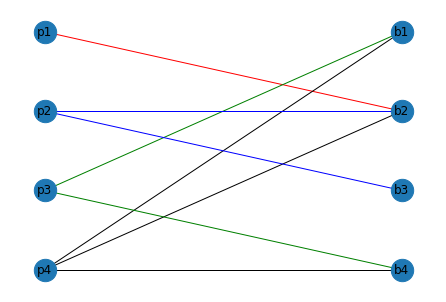

In [7]:
#plotting the book assignment considering the books' distribution (2,3,2,2)

G["p1"]["b2"]['color'] = 'red'

G["p2"]["b3"]['color'] = 'blue'
G["p2"]["b2"]['color'] = 'blue'

G["p3"]["b4"]['color'] = 'green'
G["p3"]["b1"]['color'] = 'green'

G["p4"]["b2"]['color'] = 'black'
G["p4"]["b1"]['color'] = 'black'
G["p4"]["b4"]['color'] = 'black'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color=colors, node_size=500)

**(d)** Suppose that the library can sell a copy of a book and buy a copy of another book. Which
books should be sold and bought to maximize the number of assigned books?

In [8]:
#changing the capacities between the nodes of set B accordingly to the new distribution (3,3,1,2)

new_distribution = [3,3,1,2]

for i in range(len(B)):
    G1[B[i]]["d"]["capacity"] = new_distribution[i]
    
    
#calculating the maximum flow

new_max_flow = nx.algorithms.flow.maximum_flow(G1, "o", "d", capacity = 'capacity')

print("With the new books' distribution the total assigned books are: ", new_max_flow[0])

if new_max_flow[0] == sum(new_distribution):
    print("\nAll the books are assigned")

With the new books' distribution the total assigned books are:  9

All the books are assigned


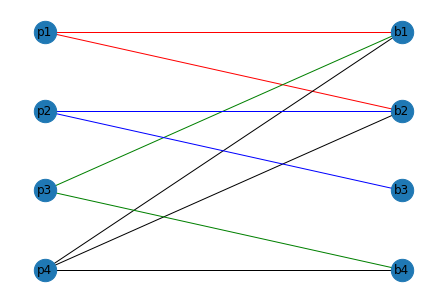

In [9]:
#plotting the book assignment considering the books' distribution (3,3,1,2)

G["p1"]["b1"]['color'] = 'red'

colors = [G[u][v]['color'] for u,v in G.edges()]


nx.draw(G, pos, with_labels = True, edge_color=colors, node_size=500)